Downlaoding Kaggle data

In [2]:
# #Mount your google drive on colab
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# # Update kaggle lib
# !pip install -U kaggle

# #generate API key from kaggle and save it in your google drive

# # Deploying API keys
# !mkdir -p ~/.kaggle
# !cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/ #give path for kaggle.json file in your drive
# !chmod 600 ~/.kaggle/kaggle.json

# # Checking kaggle commands
# !kaggle -h

# #Join the competition in kaggle

# # Dataset Download
# !kaggle competitions download -c hms-harmful-brain-activity-classification


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.7/79.7 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.6.12-py3-none-any.whl size=102969 sha256=c4194ec6b0bcf6e37b0b84297ec7e4ad37e88af9be96d1e71a47a8f336fb3f1b
  Stored in directory: /root/.cache/pip/wheels/1e/0b/7c/50f8e89c3d2f82838dbd7afeddffbb9357003009ada98216c7
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.16
    Uninstalling kaggle-1.5.16:
      Successfully uninstalled kaggle-1.5.16
usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...

options:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,models,m,files,f,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
              

In [ ]:
# #Unzip the data
# !unzip /content/hms-harmful-brain-activity-classification.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train_spectrograms/2080462125.parquet  
  inflating: /content/train_spectrograms/208059969.parquet  
  inflating: /content/train_spectrograms/2080686415.parquet  
  inflating: /content/train_spectrograms/2080973847.parquet  
  inflating: /content/train_spectrograms/2081117549.parquet  
  inflating: /content/train_spectrograms/2081307623.parquet  
  inflating: /content/train_spectrograms/2081826095.parquet  
  inflating: /content/train_spectrograms/2081944512.parquet  
  inflating: /content/train_spectrograms/2082016410.parquet  
  inflating: /content/train_spectrograms/2082370788.parquet  
  inflating: /content/train_spectrograms/2082376822.parquet  
  inflating: /content/train_spectrograms/2082907673.parquet  
  inflating: /content/train_spectrograms/2083007837.parquet  
  inflating: /content/train_spectrograms/2083142969.parquet  
  inflating: /content/train_spectrograms/2083155730.parquet  
  inflating: /conten

Installation

In [ ]:
# pip install pyarrow
# pip install --upgrade numpy
# pip install h5py

In [ ]:
# pip install -U scikit-learn

## Code

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
tqdm.pandas()
pd.options.display.max_colwidth = 10000

# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Loading Train Data

In [2]:
train_df = pd.read_csv(r'train.csv')


### Mapping train_eegs and train_spectogram  to  its Full path

In [3]:
def create_id_mapping(paths_list):
    id_map = {}
    for path in paths_list:
        file_id = os.path.basename(path).split('.')[0]  # Corrected to extract the file ID correctly
        id_map[file_id] = path
    return id_map

def mapping_id(ids, id_map):
    return id_map.get(ids)

In [4]:
# Create ID mappings for train_eeg_path_list and train_spectrograms_path_list
train_eeg_path_list = glob.glob("train_eegs/*")
train_spectrograms_path_list = glob.glob("train_spectrograms/*")
eeg_id_map = create_id_mapping(train_eeg_path_list)
spectrograms_id_map = create_id_mapping(train_spectrograms_path_list)

# Example usage:
print("Mapping train_eeg_path_list","-"*60)
train_df['eeg_path'] = train_df['eeg_id'].astype(str).progress_apply(lambda x: mapping_id(x, eeg_id_map))

print("Mapping train_spectrograms_path_list","-"*60)
train_df['spectrograms_path'] = train_df['spectrogram_id'].astype(str).progress_apply(lambda x: mapping_id(x, spectrograms_id_map))

Mapping train_eeg_path_list ------------------------------------------------------------


100%|██████████| 106800/106800 [00:00<00:00, 2342598.41it/s]


Mapping train_spectrograms_path_list ------------------------------------------------------------


100%|██████████| 106800/106800 [00:00<00:00, 2374285.34it/s]


In [5]:
train_df.head(1)

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,eeg_path,spectrograms_path
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0,train_eegs/1628180742.parquet,train_spectrograms/353733.parquet


### Mapping test_eegs and test_spectogram  to  its Full path

In [6]:
test_df = pd.read_csv(r'test.csv')

In [7]:
# Create ID mappings for train_eeg_path_list and train_spectrograms_path_list
test_eeg_path_list = glob.glob("test_eegs/*")
test_spectrograms_path_list = glob.glob("test_spectrograms/*")
eeg_id_map = create_id_mapping(test_eeg_path_list)
spectrograms_id_map = create_id_mapping(test_spectrograms_path_list)

# Example usage:
print("Mapping train_eeg_path_list","-"*60)
test_df['eeg_path'] = test_df['eeg_id'].astype(str).progress_apply(lambda x: mapping_id(x, eeg_id_map))

print("Mapping train_spectrograms_path_list","-"*60)
test_df['spectrograms_path'] = test_df['spectrogram_id'].astype(str).progress_apply(lambda x: mapping_id(x, spectrograms_id_map))

Mapping train_eeg_path_list ------------------------------------------------------------


100%|██████████| 1/1 [00:00<00:00, 3912.60it/s]


Mapping train_spectrograms_path_list ------------------------------------------------------------


100%|██████████| 1/1 [00:00<00:00, 4297.44it/s]


In [8]:
test_df.head(1)

,spectrogram_id,eeg_id,patient_id,eeg_path,spectrograms_path
0,853520,3911565283,6885,test_eegs/3911565283.parquet,test_spectrograms/853520.parquet


#### Now We Will Create A Function Which Will Convert The parquet file to .npy format i.e numpy format

In [9]:
def parquet_to_numpy(parquet_path):
    # Read the Parquet file into a DataFrame
    spec_df = pd.read_parquet(parquet_path)

    # Process the DataFrame to convert it into a numpy array
    spec_array = spec_df.fillna(0).values[:, 1:].T  # fill NaN values with 0, transpose for (Time, Freq) -> (Freq, Time)
    spec_array = spec_array.astype("float32")

    return spec_array

### Preprocesing The Image To Get The Better Visualization of the Image
[Taking Help To Preprocess The Image From This Notebook](https://www.kaggle.com/code/awsaf49/hms-hbac-kerascv-starter-notebook//)

In [10]:
def preprocess_spectrogram(image_array):

    # Normalization: Ensures that the pixel values are within a certain range
    # This helps in stabilizing the training process and ensures faster convergence
    image_array = image_array.astype('float32')
    image_array -= np.min(image_array)
    image_array /= np.max(image_array) + 1e-4

    # Log Transformation: Enhances contrast and reduces the effect of outliers
    # It helps in better visualization of the spectrogram features
    image_array = np.log(image_array + 1e-4)

    # Mean Subtraction: Centers the data around zero
    # This helps in reducing bias and improving the stability of the model
    mean = np.mean(image_array)
    image_array -= mean

    # Standardization: Scales the data to have zero mean and unit variance
    # It ensures that all features are on a similar scale, which can improve model performance
    std = np.std(image_array)
    image_array /= std + 1e-6

    return image_array

## Creating Train And Test Data Directory

In [11]:
current_dir = os.getcwd()
train_dir = os.path.join(current_dir, "train")
test_dir  = os.path.join(current_dir, "test")
print("train_dir--->", train_dir)
print("test_dir---->", test_dir)
os.makedirs(train_dir, exist_ok = True)
os.makedirs(test_dir, exist_ok = True)

train_dir---> /home/ash/projects/hw/hms-harmful-brain-activity-classification/train
test_dir----> /home/ash/projects/hw/hms-harmful-brain-activity-classification/test


### Dumping Train Spectograms Data To Train Dir

In [12]:
from PIL import Image

for i in tqdm(train_df['spectrograms_path'].unique()):
    img_array = preprocess_spectrogram(parquet_to_numpy(i))

    img_name = os.path.basename(i).split('.')[0] + ".jpeg"
    spectrograms_path = os.path.join(train_dir, "spectrograms")
    os.makedirs(spectrograms_path, exist_ok=True)

    plt.imsave(os.path.join(spectrograms_path, img_name), img_array)

100%|██████████| 11138/11138 [04:23<00:00, 42.20it/s]


### Dumping Test Spectograms to the Test Dir

In [13]:
from PIL import Image

for i in tqdm(test_df['spectrograms_path'].unique()):
    img_array = preprocess_spectrogram(parquet_to_numpy(i))

    img_name = os.path.basename(i).split('.')[0] + ".jpeg"
    spectrograms_path = os.path.join(test_dir, "spectrograms")
    os.makedirs(spectrograms_path, exist_ok=True)

    plt.imsave(os.path.join(spectrograms_path, img_name), img_array)

100%|██████████| 1/1 [00:00<00:00, 44.91it/s]


## Renaming Train Image In Train Directory Adding Class To The Train Image

In [14]:
xx = train_df['spectrograms_path expert_consensus'.split()].drop_duplicates().reset_index(drop = True)
dict_xx = dict(zip(xx['spectrograms_path'], xx['expert_consensus']))

In [15]:
for original_path in tqdm(glob.glob("train/spectrograms/*")):
    # Extract the image ID from the file name
    img_id = os.path.basename(original_path).split('.')[-2]
    # Find the corresponding value in dict_xx based on the image ID
    xx = [v for k, v in dict_xx.items() if img_id in k][0]

    # Construct the new file name with the same directory path
    directory_path = os.path.dirname(original_path)
    new_filename = f"{xx}.{img_id}.jpeg"

    # Construct the new file path
    new_path = os.path.join(directory_path, new_filename)

    # Rename the file
    os.rename(original_path, new_path)

100%|██████████| 22276/22276 [00:09<00:00, 2460.09it/s]


In [16]:
del xx, dict_xx

### Creating A Function Which Will Plot The Random Image From The Directory

In [17]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

def plot_random_images(dir_path, num_images, folder_name):
    if not os.path.exists(dir_path):
        print("Directory does not exist.")
        return

    image_files = [f for f in os.listdir(dir_path) if f.endswith('.jpeg') or f.endswith('.png') or f.endswith('.jpg')]
    if len(image_files) == 0:
        print("No image files found in the directory.")
        return

    # Shuffle the list of image files
    random.shuffle(image_files)

    # Limit the number of images to plot
    num_images = min(num_images, len(image_files))

    # Calculate the number of rows and columns based on the aspect ratio of the images
    num_rows = int(num_images ** 0.5)
    num_cols = (num_images + num_rows - 1) // num_rows

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

    for i in range(num_images):
        img_path = os.path.join(dir_path, image_files[i])
        img = Image.open(img_path)

        row = i // num_cols
        col = i % num_cols

        ax = axes[row, col]
        ax.imshow(img, cmap="gray")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlabel(image_files[i], fontsize=8, wrap=True)

    # Hide any remaining empty subplots
    for i in range(num_images, num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        axes[row, col].axis('off')

    plt.suptitle(folder_name, fontsize=16)
    plt.subplots_adjust(wspace=0.2, hspace=0.2)  # Adjust spacing between subplots
    plt.show()

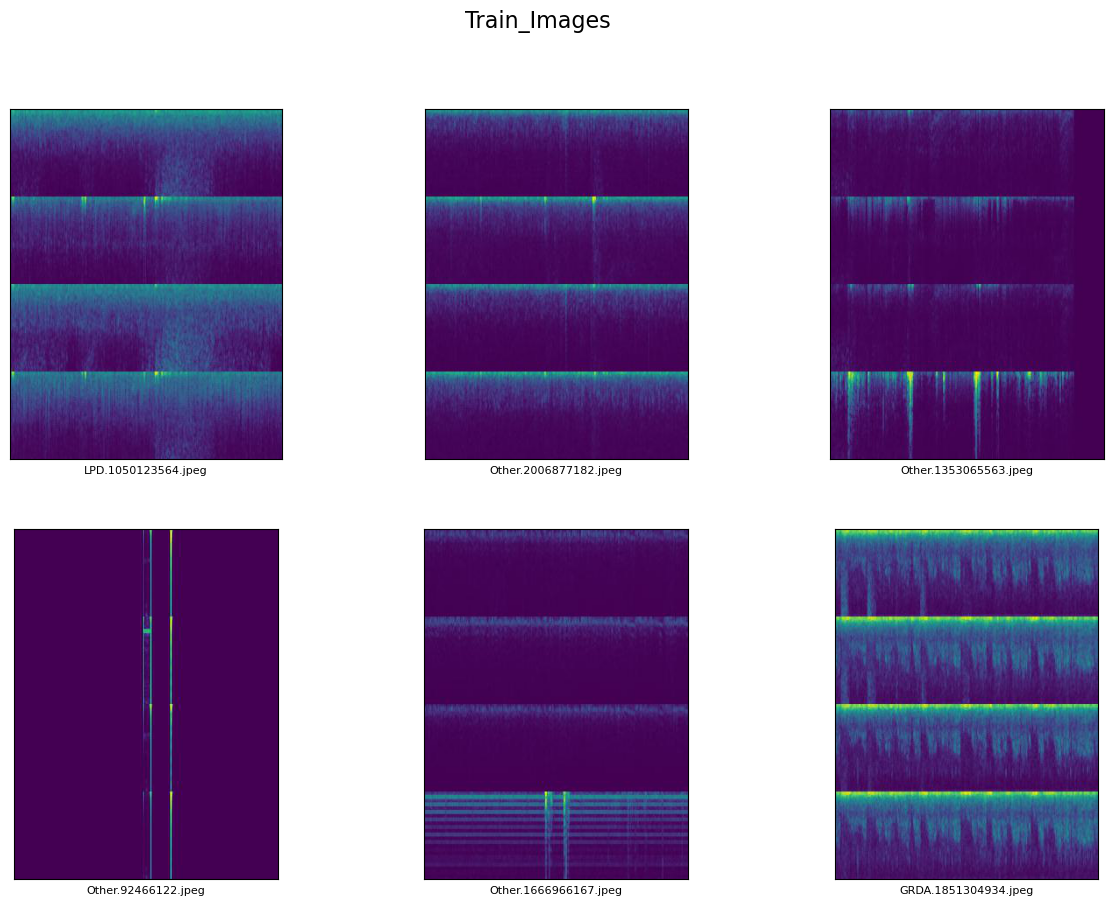

In [18]:
training_dir_spectrograms = 'train/spectrograms'
plot_random_images(training_dir_spectrograms, 6, "Train_Images")

 ### Dumping of the data is completed

#### Now We Will Create A Train Data Frame Which Will Contain  Training Image Path And Their Class Along With Their EEG_ID

#### This will Be Our Final Train Data Frame

In [19]:
def create_id_mapping(paths_list):
    id_map = {}
    for path in paths_list:
        file_id = os.path.basename(path).split('.')[1]  # Corrected to extract the file ID correctly
        id_map[file_id] = path
    return id_map

def mapping_id(ids, id_map):
    return id_map.get(ids)

In [20]:
# Create ID mappings for train_eeg_path_list and train_spectrograms_path_list
train_spectrograms_path_list = glob.glob("train/spectrograms/*")
spectrograms_id_map = create_id_mapping(train_spectrograms_path_list)

train_df = train_df['eeg_id spectrogram_id expert_consensus'.split()].drop_duplicates().reset_index(drop = True)

train_df['spectrograms_path'] = train_df['spectrogram_id'].astype(str).progress_apply(lambda x: mapping_id(x, spectrograms_id_map))

100%|██████████| 18013/18013 [00:00<00:00, 2273950.28it/s]


In [21]:
train_df['spectrograms_path']

0         train/spectrograms/Seizure.353733.jpeg
1             train/spectrograms/GPD.924234.jpeg
2            train/spectrograms/LRDA.999431.jpeg
3           train/spectrograms/LRDA.1084844.jpeg
4        train/spectrograms/Seizure.1219001.jpeg
                          ...                   
18008     train/spectrograms/LPD.2146798838.jpeg
18009     train/spectrograms/LPD.2146798838.jpeg
18010     train/spectrograms/LPD.2146798838.jpeg
18011     train/spectrograms/LPD.2147312808.jpeg
18012    train/spectrograms/LRDA.2147388374.jpeg
Name: spectrograms_path, Length: 18013, dtype: object

### Creating Train And Validation Split

In [22]:
train_df.head(5)

,eeg_id,spectrogram_id,expert_consensus,spectrograms_path
0,1628180742,353733,Seizure,train/spectrograms/Seizure.353733.jpeg
1,2277392603,924234,GPD,train/spectrograms/GPD.924234.jpeg
2,722738444,999431,LRDA,train/spectrograms/LRDA.999431.jpeg
3,387987538,1084844,LRDA,train/spectrograms/LRDA.1084844.jpeg
4,2175806584,1219001,Seizure,train/spectrograms/Seizure.1219001.jpeg


In [23]:
from sklearn.model_selection import train_test_split
train_dataset, valid_dataset = train_test_split(train_df ,test_size = 0.3 , random_state = 42, shuffle = True,
                                               stratify = train_df['expert_consensus'])

### Training Set Validation Set

In [24]:
train_dataset.head(5)

,eeg_id,spectrogram_id,expert_consensus,spectrograms_path
1859,2316276690,226714583,Other,train/spectrograms/Seizure.226714583.jpeg
3252,519346170,394227767,LPD,train/spectrograms/LRDA.394227767.jpeg
16198,4262734836,1943821262,Other,train/spectrograms/Other.1943821262.jpeg
6059,2497647144,728921143,Other,train/spectrograms/Other.728921143.jpeg
6386,2711585141,764146759,LRDA,train/spectrograms/LRDA.764146759.jpeg


### Image Data Generator

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data generators
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()

2024-04-20 20:16:06.358802: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 20:16:06.358830: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 20:16:06.359738: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-20 20:16:06.363733: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-20 20:16:07.064728: W tensorflow/compiler/tf2

### Training Set Validation Set

In [26]:
training_set = train_datagen.flow_from_dataframe(
                        dataframe = train_dataset,
                        x_col = 'spectrograms_path',
                        y_col = 'expert_consensus',
                        target_size=(299,299),
                        color_mode='rgb',
                        class_mode = 'categorical',
                        batch_size= 64)

validation_set = test_datagen.flow_from_dataframe(
                dataframe = valid_dataset,
                x_col = 'spectrograms_path',
                y_col = 'expert_consensus',
                color_mode='rgb',
                target_size = (299, 299),
                class_mode = 'categorical',
                batch_size = 64)

Found 12609 validated image filenames belonging to 6 classes.
Found 5404 validated image filenames belonging to 6 classes.


# **MODEL 1 - EffecinentNETV2B2**

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.losses import KLDivergence
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
import matplotlib.pyplot as plt

# Load the EfficientNetV2-B2 model
base_model = EfficientNetV2B2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Add GlobalAveragePooling2D layer
x = GlobalAveragePooling2D()(base_model.output)

# Add Dense layer with softmax activation for classification
outputs = Dense(6, activation='softmax')(x)

# Create the model
model2 = Model(inputs=base_model.input, outputs=outputs)

# Compile the model
model2.compile(optimizer=Adam(lr=0.001), loss=KLDivergence(), metrics=['accuracy'])

# Display the model summary
model2.summary()

# Train the model
history = model2.fit(
    training_set,
    validation_data=validation_set,
    epochs=10,
    batch_size=32,
    callbacks=[tf.keras.callbacks.LambdaCallback(
        on_epoch_end=lambda epoch, logs: print(f"Training loss after epoch {epoch+1}: {logs['loss']} - Validation loss: {logs['val_loss']}"))
])

2024-04-20 20:16:07.661935: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-20 20:16:07.662174: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-20 20:16:07.691229: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 299, 299, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 299, 299, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 299, 299, 3)          0         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv (Conv2D)          (None, 150, 150, 32)         864       ['normalization[0][0]']   

2024-04-20 20:16:30.944976: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/block1b_drop/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-04-20 20:16:32.725052: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-04-20 20:16:34.350947: I external/local_xla/xla/service/service.cc:168] XLA service 0x746058a035f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-04-20 20:16:34.350967: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-04-20 20:16:34.350972: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (1): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-04-20 20:16:34.354625: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash r

198/198 [==============================] - 110s 357ms/step - loss: 1.2060 - accuracy: 0.5470 - val_loss: 1.0438 - val_accuracy: 0.6142
Epoch 2/10
198/198 [==============================] - 69s 346ms/step - loss: 0.9944 - accuracy: 0.6338 - val_loss: 0.9672 - val_accuracy: 0.6447
Epoch 3/10
198/198 [==============================] - 68s 344ms/step - loss: 0.8918 - accuracy: 0.6691 - val_loss: 0.9913 - val_accuracy: 0.6403
Epoch 4/10
198/198 [==============================] - 68s 345ms/step - loss: 0.8346 - accuracy: 0.6855 - val_loss: 0.9505 - val_accuracy: 0.6525
Epoch 5/10
198/198 [==============================] - 69s 348ms/step - loss: 0.7638 - accuracy: 0.7108 - val_loss: 0.9790 - val_accuracy: 0.6475
Epoch 6/10
198/198 [==============================] - 69s 348ms/step - loss: 0.7066 - accuracy: 0.7351 - val_loss: 1.0123 - val_accuracy: 0.6338
Epoch 7/10
198/198 [==============================] - 69s 348ms/step - loss: 0.6748 - accuracy: 0.7415 - val_loss: 0.9941 - val_accuracy: 0.

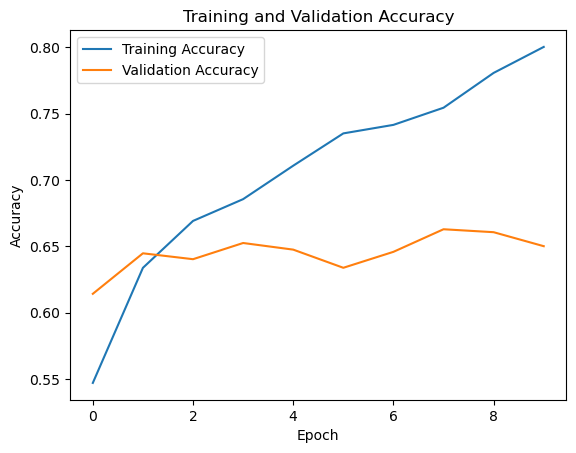

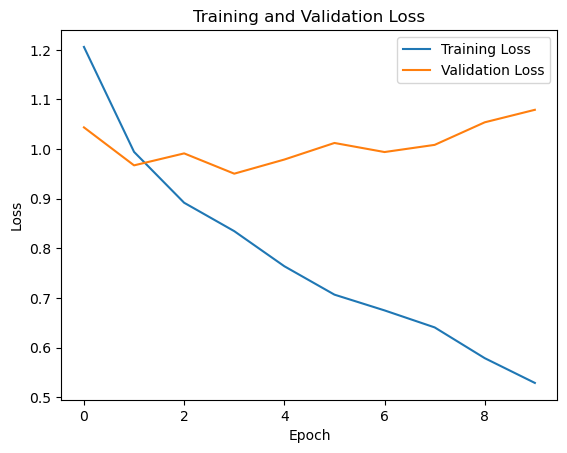

In [28]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [153]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
import numpy as np

# Get the model's predictions on the validation set
predictions = model2.predict(validation_set)

# Convert predictions to class labels (indices)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels
true_labels = validation_set.labels

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

85/85 [==============================] - 22s 238ms/step
Accuracy: 0.26757957068837895
Precision: 0.24729265431018746
F1 Score: 0.25604500247484774


### 📩 | Submission¶


In [37]:
def model_probability(img_path, model, target_size=(299, 299)):
    # Load and preprocess the image
    img = Image.open(img_path)
    img = img.resize(target_size)  # Resize the image to the input size of the model

    # Expand the dimensions of the image array to match the input shape expected by the model
    expand_dim = np.expand_dims(img, axis=0)

    # Make prediction using the model
    predictions = model2.predict(expand_dim, verbose=False)[0]

    # Get class labels and indices
    class_indices = {v: k for k, v in validation_set.class_indices.items()}

    # Create dictionary with class labels as keys and model probabilities as values
    probabilities = {class_indices[i]: prob for i, prob in enumerate(predictions)}

    return probabilities

In [38]:
img_path = 'test/spectrograms/853520.jpeg'
model_prob = model_probability(img_path, model= model2, target_size=(299, 299))
model_prob

{'GPD': 0.0010933196,
 'GRDA': 0.0023121529,
 'LPD': 0.12144493,
 'LRDA': 0.089399315,
 'Other': 0.66750807,
 'Seizure': 0.11824225}

In [39]:
# Create a DataFrame from the model probabilities
submission_df = pd.DataFrame([model_prob], columns=model_prob.keys())

# Add 'eeg_id' column from test_df as the first column
submission_df.insert(0, 'eeg_id', test_df['eeg_id'].copy())

# Rename the columns
submission_df.rename(columns={
    'Seizure': 'seizure_vote',
    'LPD': 'lpd_vote',
    'GPD': 'gpd_vote',
    'LRDA': 'lrda_vote',
    'GRDA': 'grda_vote',
    'Other': 'other_vote'
}, inplace=True)

In [74]:
submission_df

,eeg_id,gpd_vote,grda_vote,lpd_vote,lrda_vote,other_vote,seizure_vote
0,3911565283,0.001093,0.002312,0.121445,0.089399,0.667508,0.118242


# Kl Divergance

In [65]:
def kl_divergence(p, q):
    """
    Compute the Kullback-Leibler Divergence between two probability distributions.

    Args:
    - p (numpy.ndarray): The first probability distribution.
    - q (numpy.ndarray): The second probability distribution.

    Returns:
    - float: The KL Divergence between the two distributions.
    """
    # Ensure both distributions have the same shape
    assert p.shape == q.shape, "Probability distributions must have the same shape"

    # Apply the KL Divergence formula
    kl_div = np.sum(p * np.log(p / q))

    return kl_div

In [92]:
#Obtain the predicted probabilities for the validation set
predicted_probabilities = submission_df

In [67]:
# #Compute the true probabilities (ground truth) for the validation set
# true_probabilities = []  # Fill this list with true probabilities for each validation sample

In [68]:
# num_samples = len(validation_set)
# num_classes = 6
# for _ in range(num_samples):
#     true_probability = np.zeros(num_classes)
#     true_probability[np.random.randint(num_classes)] = 1.0  #Randomly assign a probability of 1.0 to one class
#     true_probabilities.append(true_probability)

In [100]:
import pandas as pd
 
# Given data
true_probabilities = {
    'eeg_id': [3911565283],
    'seizure_vote': [0.044966],
    'lpd_vote': [0.073867],
    'gpd_vote': [0.003442],
    'lrda_vote': [0.338065],
    'grda_vote': [0.041618],
    'other_vote': [0.498041]
}
 
# Create DataFrame
true_probabilities = pd.DataFrame(true_probabilities)
 
# Display the DataFrame
print(true_probabilities)

       eeg_id  seizure_vote  lpd_vote  gpd_vote  lrda_vote  grda_vote  \
0  3911565283      0.044966  0.073867  0.003442   0.338065   0.041618   

   other_vote  
0    0.498041  


In [93]:
# import pandas as pd
 
# # Given data
# true_probabilities = {
#     'eeg_id': [3911565283],
#     'seizure_vote': [0.094089],
#     'lpd_vote': [0.066091],
#     'gpd_vote': [0.001964],
#     'lrda_vote': [0.406408],
#     'grda_vote': [0.022012],
#     'other_vote': [0.409436]
# }
 
# # Create DataFrame
# true_probabilities = pd.DataFrame(true_probabilities)
 
# # Display the DataFrame
# print(true_probabilities)

       eeg_id  seizure_vote  lpd_vote  gpd_vote  lrda_vote  grda_vote  \
0  3911565283      0.094089  0.066091  0.001964   0.406408   0.022012   

   other_vote  
0    0.409436  


In [101]:
true_probabilities

,eeg_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,3911565283,0.044966,0.073867,0.003442,0.338065,0.041618,0.498041


In [95]:
predicted_probabilities

,eeg_id,gpd_vote,grda_vote,lpd_vote,lrda_vote,other_vote,seizure_vote
0,3911565283,0.001093,0.002312,0.121445,0.089399,0.667508,0.118242


In [105]:
#Compute the KL Divergence between true and predicted probability distributions
kl_divergence_value = kl_divergence(true_probabilities, predicted_probabilities)
print("KL Divergence:", kl_divergence_value)

KL Divergence: 1.461075625155385


# Explainable AI

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 21ms/step


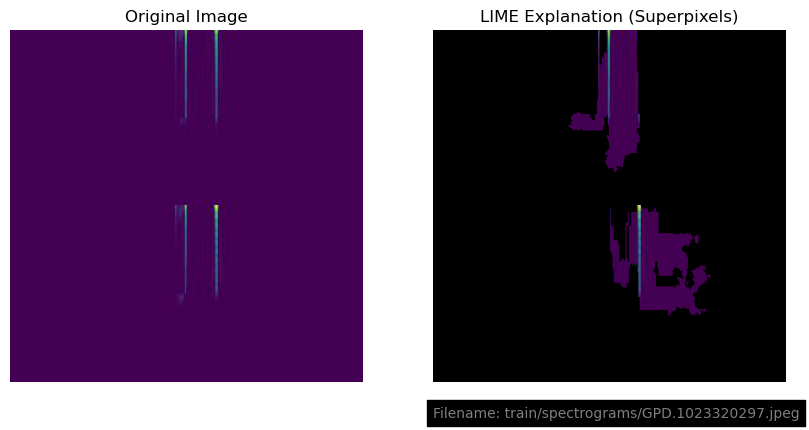

Press Enter to continue to the next image or type 'stop' to stop:  


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


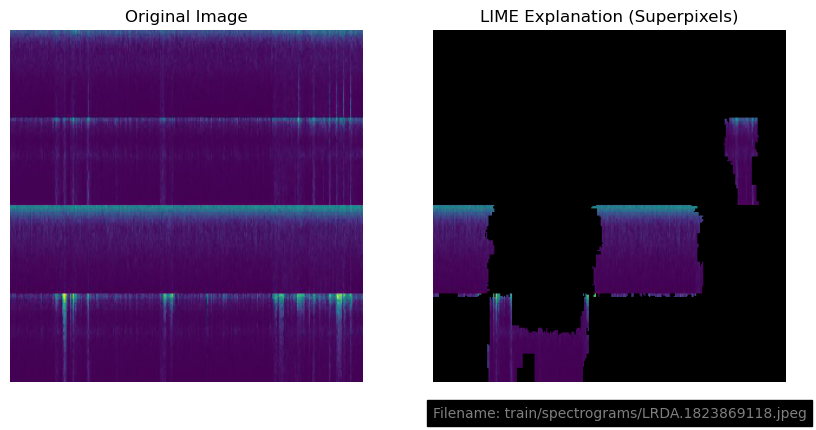

Press Enter to continue to the next image or type 'stop' to stop:  


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


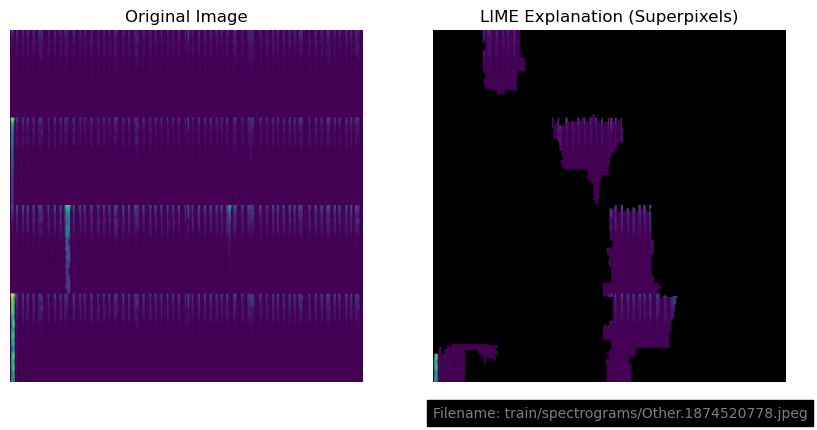

Press Enter to continue to the next image or type 'stop' to stop:  


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 23ms/step


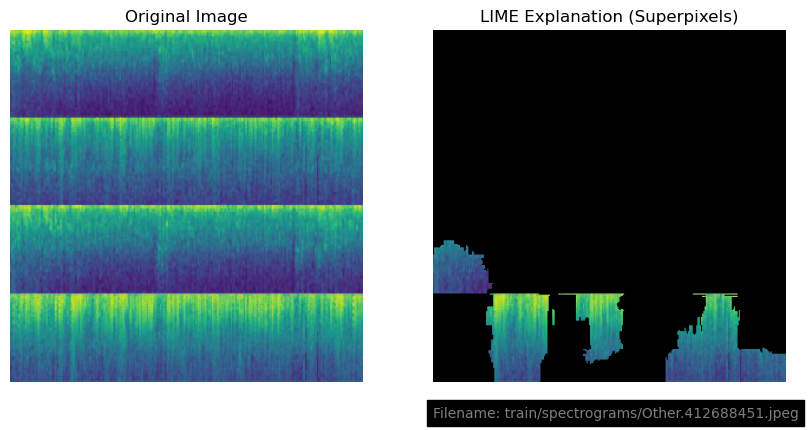

Press Enter to continue to the next image or type 'stop' to stop:  


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


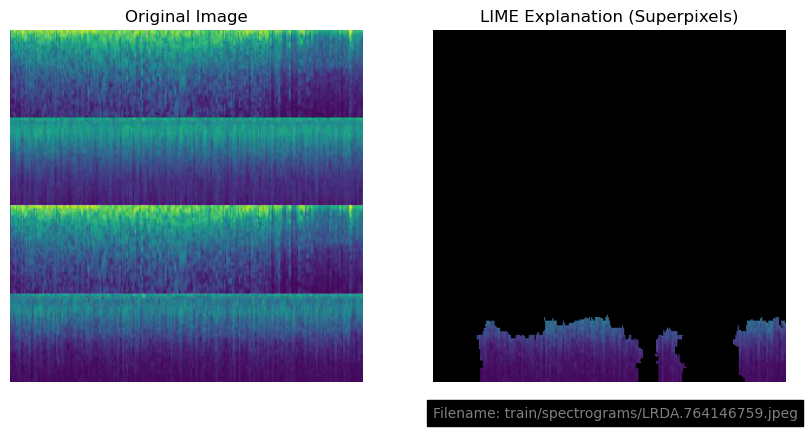

Press Enter to continue to the next image or type 'stop' to stop:  


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 22ms/step


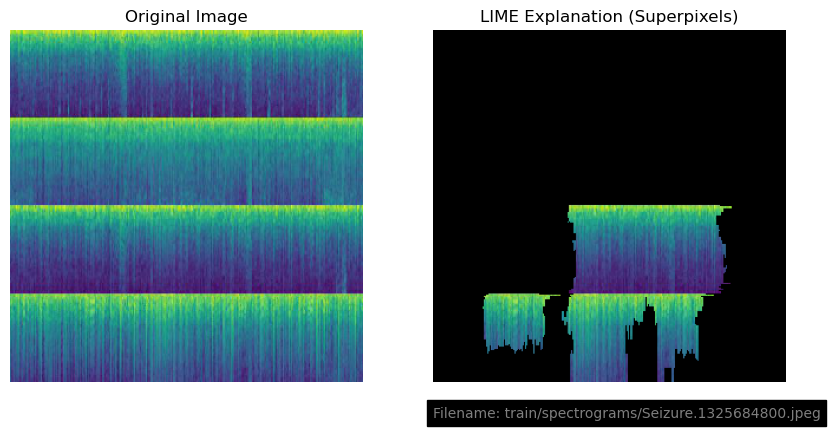

Press Enter to continue to the next image or type 'stop' to stop:  stop


In [158]:
import lime
from lime import lime_image
import matplotlib.pyplot as plt
import numpy as np

# Initialize LIME explainer
explainer = lime_image.LimeImageExplainer()

# Retrieve a batch of images and their filenames from the validation set
images, labels = validation_set.next()
file_names = validation_set.filenames

# Normalize pixel values to the range [0, 1]
images = images.astype('float32') / 255.0

for index, image in enumerate(images):
    # Explain the model's prediction for the sample image
    explanation = explainer.explain_instance(image, model2.predict)
    
    # Get the explanation image as an overlay on the original image
    explanation_image, mask = explanation.get_image_and_mask(
        explanation.top_labels[0],
        positive_only=True,
        num_features=5,
        hide_rest=False
    )
    
    # Apply the mask to the original image
    masked_image = np.copy(image)
    masked_image[mask == 0] = 0  # Set pixels outside the mask to black
    
    # Display the original image and the masked image with superpixels
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(image)
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    
    axs[1].imshow(masked_image)
    axs[1].set_title('LIME Explanation (Superpixels)')
    axs[1].axis('off')
    
    # Display the filename associated with the image
    axs[1].text(0, -0.1, f"Filename: {file_names[index]}", transform=axs[1].transAxes, fontsize=10, color='white', backgroundcolor='black', alpha=0.5)
    
    plt.show()
    if index == len(images) - 1:
        print("Last image in batch.")
        break
    if input("Press Enter to continue to the next image or type 'stop' to stop: ").strip().lower() == 'stop':
        break
